In [1]:
import numpy as np
import matplotlib.pyplot as plt
import EPPE_Simulator as eppe
import astropy.constants as const
from matplotlib.ticker import MaxNLocator

In [2]:
orb = eppe.KeplerOrbit(Porb=1, inc=80, Omega=270)
# orb = eppe.KeplerOrbit(Porb=1, inc=60, Omega=270)
# orb.plot_orbit()
# plt.show()
print(np.min(np.sqrt(np.sum(np.array(orb.xyz(np.linspace(0,1,1000)))[1:]**2, axis=0)))/const.au.value)
# orb = eppe.KeplerOrbit(Porb=1, inc=0, Omega=190)
# orb = eppe.KeplerOrbit(Porb=1, inc=45, Omega=194.215)
# orb = eppe.KeplerOrbit(Porb=1, inc=40, Omega=193.1015)
# orb = eppe.KeplerOrbit(Porb=1, inc=75, Omega=222)
# orb = eppe.KeplerOrbit(Porb=1, inc=79, Omega=245.5)
orb = eppe.KeplerOrbit(Porb=1, inc=79.9, Omega=261.95)
# orb = eppe.KeplerOrbit(Porb=1, inc=0, Omega=30)
# orb = eppe.KeplerOrbit(Porb=1, inc=45, Omega=30-180)
# orb.plot_orbit()
# plt.show()
print(np.min(np.sqrt(np.sum(np.array(orb.xyz(np.linspace(0,1,1000)))[1:]**2, axis=0)))/const.au.value)

0.17364817766693036
0.17364129352938767


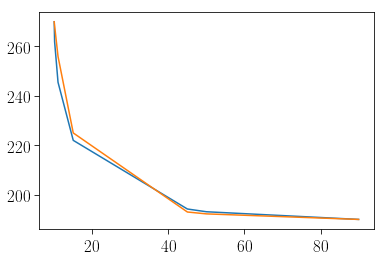

In [3]:
plt.plot(90-np.array([0,40,45,75,79,79.9,80]), [190, 193.1015, 194.215, 222, 245.5, 261.95, 270])
inc= 80
# x = np.linspace(0,inc,15,endpoint=True)
x = 90-np.array([0,40,45,75,79,79.9,80])
plt.plot(x, 1/(x/90)**2+180+9)
plt.show()

In [4]:
1/(x/90)**2+180+9

array([190.        , 192.24      , 193.        , 225.        ,
       255.94214876, 268.40398   , 270.        ])

In [5]:
systems = eppe.Systems(load=True, nPlanets=2)

In [6]:
mission = eppe.EPPE()
expTime = 2
intTime = 10*3*24.
mission = eppe.EPPE() # EPPE
stokesCurves = mission.observe_polarization(systems, expTime, intTime, photonNoise=False)
fps, fstars, times, phases = mission.observe_photometric(systems, expTime, intTime, photonNoise=False)

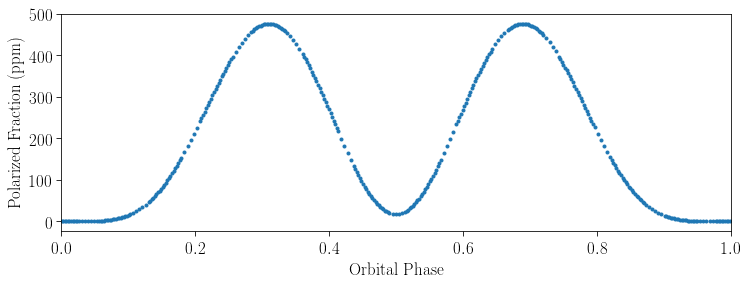

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))

i = np.where(systems.catalogue['name']=='WASP-12 b')[0][0]
ax.plot(stokesCurves[i][-1], np.sqrt(stokesCurves[i][1]**2+stokesCurves[i][2]**2)/stokesCurves[i][0]*1e6, '.')

ax.set_ylabel(r'$\rm Polarized~Fraction~(ppm)$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
plt.show()
plt.close(fig)

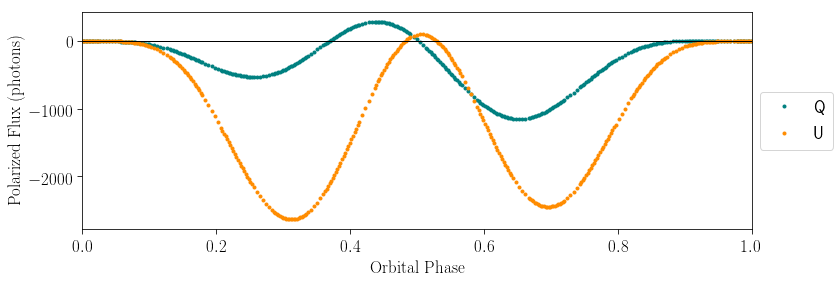

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))

i = np.where(systems.catalogue['name']=='WASP-12 b')[0][0]
ax.plot(stokesCurves[i][-1], stokesCurves[i][1], '.', c='teal', label='Q')
ax.plot(stokesCurves[i][-1], stokesCurves[i][2], '.', c='darkorange', label='U')

ax.plot([0,1], [0,0], lw=1, c='k')

ax.set_ylabel(r'$\rm Polarized~Flux~(photons)$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
ax.legend(loc=6, bbox_to_anchor=(1,0.5))
plt.show()
plt.close(fig)